In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv("../input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
enc = OrdinalEncoder()
enc.fit_transform(data[["Sex"]].values)
data["Sex_code"] = enc.transform(data[["Sex"]].values)
data["Sex_code"]


0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
886    1.0
887    0.0
888    0.0
889    1.0
890    1.0
Name: Sex_code, Length: 891, dtype: float64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

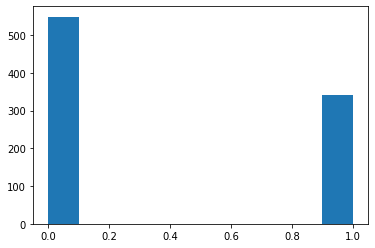

In [4]:
plt.hist(data["Survived"])

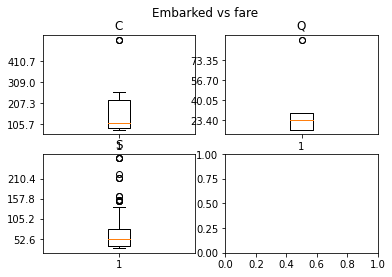

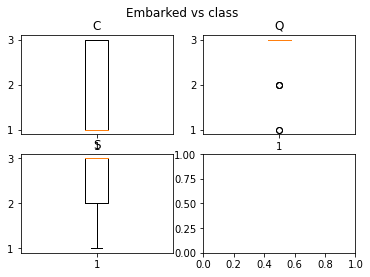

In [13]:
em_grouped_data = data.groupby("Embarked")

fig, ax = plt.subplots(2,2)
fig2, ax2 = plt.subplots(2,2)
fig.suptitle("Embarked vs fare")
fig2.suptitle("Embarked vs class")
for idx,group in enumerate(em_grouped_data.groups):
    group_data = em_grouped_data.get_group(group)
    fare_group_data = group_data[(group_data["Fare"]>=group_data["Fare"].quantile(0.75)) & (group_data["Fare"]<=group_data["Fare"].quantile(1))]
    ax[idx//2][idx%2].set_yticks(np.arange(group_data["Fare"].min(), group_data["Fare"].max(), (group_data["Fare"].max()-group_data["Fare"].min())/5))
    ax[idx//2][idx%2].set_title(group)
    ax[idx//2][idx%2].label = group
    ax[idx//2][idx%2].boxplot(fare_group_data["Fare"])
    ###
    ax2[idx//2][idx%2].set_title(group)
    ax2[idx//2][idx%2].label = group
    ax2[idx//2][idx%2].boxplot(group_data["Pclass"])
    
#     print(em_grouped_data.get_group(group))
plt.show()

In [14]:
data[(data["Embarked"]=="C") & (data["Pclass"]!=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1.0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1.0
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C,0.0
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1.0
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,0.0
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,0.0


In [15]:
# data[["Last Name", "First Name"]] = 
data[["Last Name","First Name"]] = data["Name"].apply(lambda x:np.array(x.split(","))).tolist()


In [16]:
data[["Last Name", "First Name"]]

,Last Name,First Name
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [17]:
data[data["Pclass"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Last Name,First Name


In [18]:
ln_grouped_data = data.groupby(["Last Name", "Pclass"]).groups
        
# print(ln_grouped_data[["Cabin"]].transform("ffill"))

print(len(ln_grouped_data))
for group in ln_grouped_data:
    if(not (data.loc[ln_grouped_data[group]][["Cabin", "Embarked"]].isna().all(axis=0).all()==data.loc[ln_grouped_data[group]][["Cabin","Embarked"]].isna().any(axis=0).all())):
        print(group)
        data.loc[ln_grouped_data[group],['Cabin','Embarked']] = data.loc[ln_grouped_data[group]][["Cabin", "Embarked"]].fillna(method="ffill").values
        print(data.loc[ln_grouped_data[group]][["Cabin", "Embarked"]])

686


In [19]:
(data.isna()*1).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_code         0
Last Name        0
First Name       0
dtype: int64

In [20]:
data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
import re

def tr(x):
    if(type(x)==str):
        return (x[0])
    else:
        return(np.nan)
data["Cabin_code"] = data["Cabin"].apply(tr)

In [22]:
data.groupby(["Cabin_code","Pclass"]).groups.keys()

dict_keys([('A', 1), ('B', 1), ('C', 1), ('D', 1), ('D', 2), ('E', 1), ('E', 2), ('E', 3), ('F', 2), ('F', 3), ('G', 3), ('T', 1), (nan, 1), (nan, 2), (nan, 3)])

In [23]:
no_cab_data = data[data["Cabin_code"].isna()]
cab_data = data[data["Cabin_code"].notna()]

In [24]:
cabin_enc = OrdinalEncoder()
cabin_enc.fit_transform(cab_data[["Cabin_code"]].values)
cab_data["Cabin_enc_code"] = cabin_enc.transform(cab_data[["Cabin_code"]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
cab_data[cab_data["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Last Name,First Name,Cabin_code,Cabin_enc_code
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0.0,Icard,Miss. Amelie,B,1.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0.0,Stone,Mrs. George Nelson (Martha Evelyn),B,1.0


In [26]:
cab_data[["Pclass","Fare", "Cabin_enc_code"]].corr()

,Pclass,Fare,Cabin_enc_code
Pclass,1.000000,-0.311713,0.598211
Fare,-0.311713,1.000000,-0.298487
Cabin_enc_code,0.598211,-0.298487,1.000000


In [27]:
pred_file = pd.read_csv("../input/titanic/test.csv")
pred_file.shape

(418, 11)

In [28]:
pred_file["Sex_code"] = enc.transform(pred_file[["Sex"]].values)

In [29]:
pred_file[pred_file["Cabin"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0.0
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1.0


In [30]:
from sklearn.linear_model import LogisticRegression
X = cab_data[["Fare", "Pclass"]].values
y = cab_data["Cabin_enc_code"].values
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X,y)
no_cab_data["Cabin_enc_code"] = clf.predict(no_cab_data[["Fare","Pclass"]].values)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [31]:
data = cab_data.append(no_cab_data)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf.fit(data[["Pclass","Sex_code","SibSp","Parch","Cabin_enc_code"]], data["Survived"])


RandomForestClassifier(n_estimators=10)

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clf,cab_data[["Pclass","Sex_code","SibSp","Parch","Cabin_enc_code"]], cab_data["Survived"], cv=10)
print(scores)

[0.61904762 0.71428571 0.76190476 0.85714286 0.65       0.75
 0.55       0.65       0.7        0.9       ]


In [34]:
pred_file

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1.0


In [35]:
pred_file[pred_file["Fare"].isna()]
pred_file.iloc[152]["Fare"] = 52.6
pred_file[["Fare"]] = pred_file[["Fare"]].fillna(52.6)
pred_file[pred_file["Fare"].isna()]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code


In [36]:
pred_file[["Cabin_enc_code"]] = clf.predict(pred_file[["Fare","Pclass"]].values)

In [37]:
pred_file[["Survived"]] = rf_clf.predict(pred_file[["Pclass","Sex_code","SibSp","Parch","Cabin_enc_code"]])

In [38]:
sub_file = pd.read_csv("../input/titanic/gender_submission.csv")

In [39]:
pred_file

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Cabin_enc_code,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0,5.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,5.0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0,5.0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0,5.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1.0,5.0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.0,2.0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0,5.0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1.0,5.0,0


In [40]:
pred_file[["PassengerId","Survived"]].to_csv("./prediction.csv")